# **KAGGLE di ALESSANDRO DELL'ORTO (num matricola 876909)**

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.display import IFrame

IFrame(src='https://en.wikipedia.org/wiki/Titanic', width=700, height=500)

# Load the train data

Firstly, we must load the dataset. We use [Panda](https://pandas.pydata.org/) .

In [225]:
train_data = pd.read_csv("train.csv", encoding="utf8" )
test_data = pd.read_csv("test.csv", encoding="utf8")

In [4]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_data.PassengerId.unique().shape

(891,)

# Analyse features

In [6]:
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(15,7))

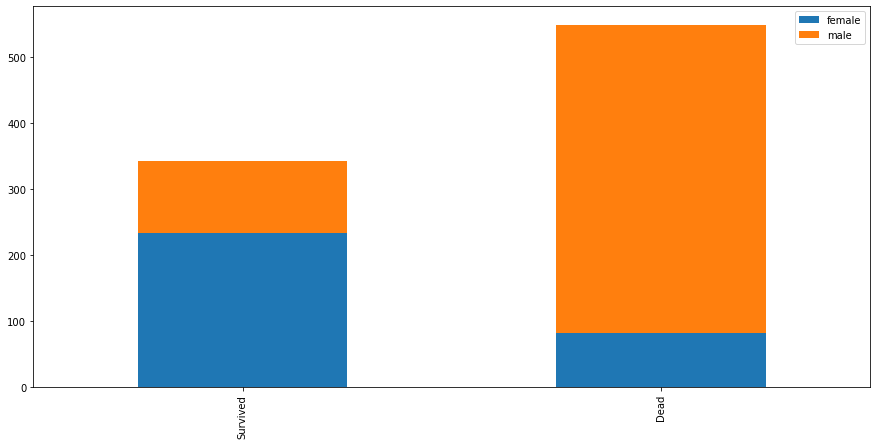

In [7]:
bar_chart('Sex')

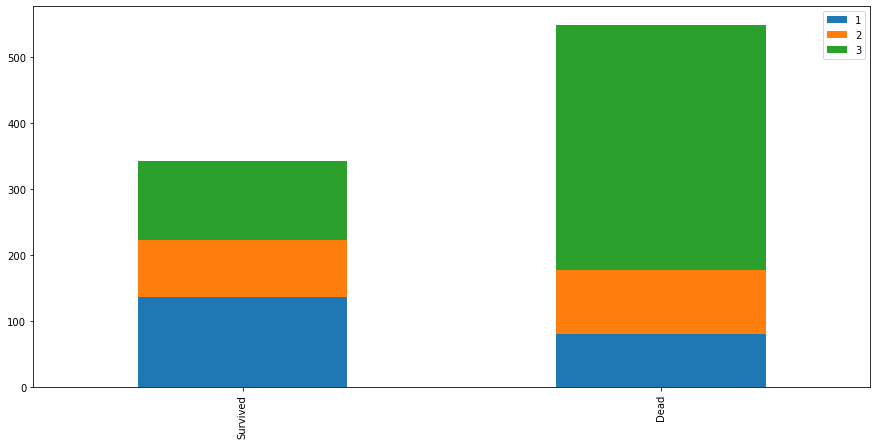

In [8]:
bar_chart('Pclass')

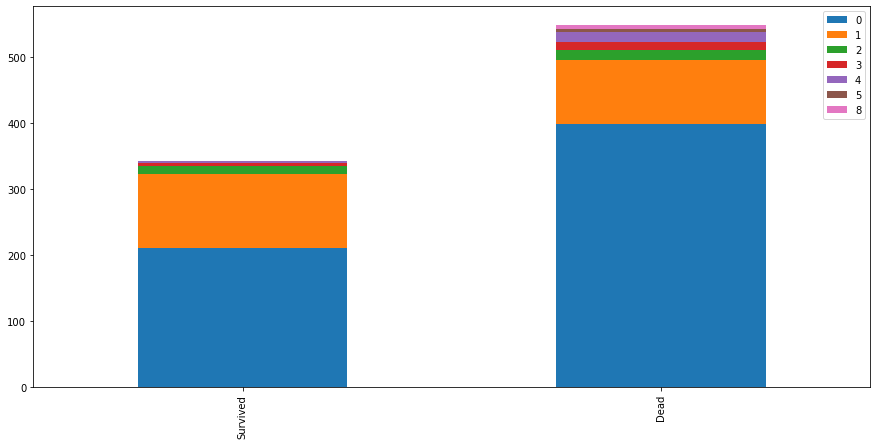

In [9]:
bar_chart('SibSp')

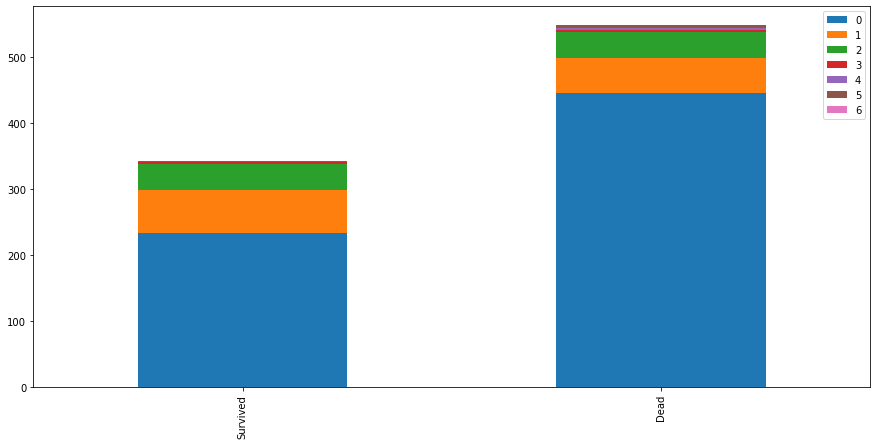

In [10]:
bar_chart('Parch')

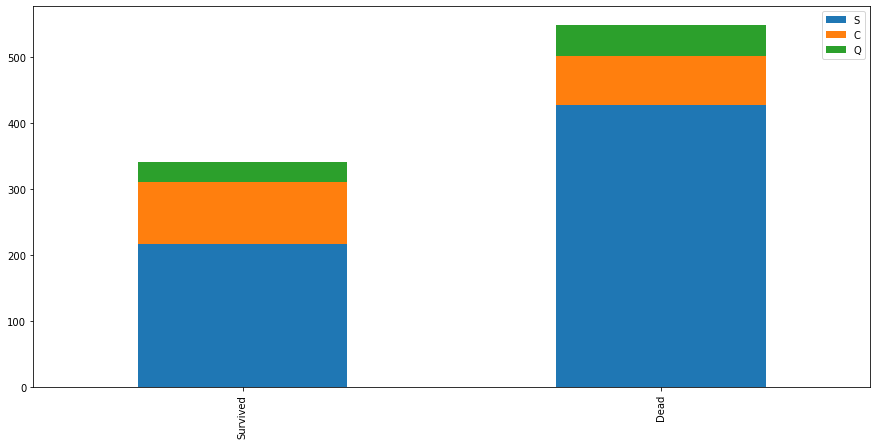

In [11]:
bar_chart('Embarked')

how much NaN value are there?

In [12]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Select features and extract the target

Remove "Cabin" feature, too much NaN amd remove 'Survived','Name','PassengerId','Ticket' features

In [241]:
train_data.dropna(subset=['Embarked'],inplace=True)
X= train_data.drop(columns=['Survived','Name','PassengerId','Ticket','Cabin'])
X_test_f=test_data.drop(columns=['Name','PassengerId','Ticket','Cabin'])
y = train_data['Survived']

In [242]:
X_test_f.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [243]:
X_test_f.shape

(418, 7)

In [244]:
y=np.asarray(y)
y.shape

(889,)

In [245]:
X.shape

(889, 7)

In [246]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

numeric_features = ['Age', 'Fare','SibSp','Parch']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = ['Embarked', 'Sex', 'Pclass']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

X_p=preprocessor.fit_transform(X)

In [247]:
X_test_p=preprocessor.transform(X_test_f)

In [248]:
X_p.shape

(889, 12)

In [249]:
y.shape

(889,)

In [250]:
X_test_p.shape

(418, 12)

# Model Selection

In [251]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from collections import OrderedDict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
"""
We are going to try different model and choose the one with best score
"""
models = OrderedDict([
          ('Knn', KNeighborsClassifier()),
          ('Logistic Regression', LogisticRegression(max_iter=10000)),
          ('Linear SVM', SVC(kernel='linear', probability=True)),
          ('Poly SVM', SVC(kernel='poly',  probability=True)),
          ('RBF SVM', SVC(kernel='rbf',  probability=True)),
          ('Classification Tree', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()),
          ('Multilayer Perceptron', MLPClassifier(activation='tanh',solver='adam', max_iter=10000,
                                                  learning_rate_init=0.001, random_state=0))
          ])


def training(X,y,model='Logistic Regression'):
    scorers    = {'f1_score': make_scorer(f1_score),
              'accuracy_score': make_scorer(accuracy_score),
              'precision_score': make_scorer(precision_score)
             }
    if model=='Knn':
        n_neighbors=[1,2,3,4,5,10,20,30]
        knn=models[model]
        gs = GridSearchCV(knn,param_grid={"n_neighbors": n_neighbors},scoring=scorers,refit='accuracy_score',cv=10,n_jobs=-3,verbose=2)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='Gauss Naive Bayes':
        var_smoothing=np.logspace(-10,-6,20)
        gnb=models[model]
        gs = GridSearchCV(gnb,param_grid={"var_smoothing": var_smoothing},scoring=scorers,refit='accuracy_score',cv=10,n_jobs=-3,verbose=2)
        if sparse.issparse(X):
            Z=X.toarray()
            gs.fit(Z, y)
        else:
            gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='Multi Naive Bayes':
        alpha=np.logspace(-3,0,20)
        mnb=models[model]
        gs = GridSearchCV(mnb,param_grid={"alpha": alpha},scoring=scorers,refit='accuracy_score',cv=10,n_jobs=-3,verbose=2)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='Logistic Regression':
        C  = np.logspace(-3,2,5)
        lr = models[model]
        gs = GridSearchCV(lr,param_grid={"C": C},scoring=scorers,refit='accuracy_score',cv=10,n_jobs=-3,verbose=2)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='Linear SVM':
        C=np.logspace(-3,2,5)
        lsvm=models[model]
        gs = GridSearchCV(lsvm,param_grid={"C": C},scoring=scorers,refit='accuracy_score',cv=10,n_jobs=-3,verbose=2)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='RBF SVM':
        gamma=np.logspace(-4,1,10)
        C=np.logspace(-3,3,10)
        rsvm=models[model]
        gs = GridSearchCV(rsvm,param_grid={"C": C,"gamma":gamma},scoring=scorers,refit='accuracy_score',cv=10,n_jobs=-3,verbose=2)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='Classification Tree':
        max_depth=[30,40,50,100]
        ct=models[model]
        gs = GridSearchCV(ct,param_grid={"max_depth": max_depth},scoring=scorers,refit='accuracy_score',cv=10,n_jobs=-3,verbose=2)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='Random Forest':
        max_depth=np.arange(1,10,1)
        n_estimators=np.arange(10,25,1)
        rf=models[model]
        gs = GridSearchCV(rf,param_grid={"max_depth": max_depth,"n_estimators": n_estimators},scoring=scorers,refit='accuracy_score',cv=10,n_jobs=-3,verbose=1)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='Multilayer Perceptron':
        hidden_layer_sizes=[(12,4,2),(6,5,4,3,2),(7,6,5,4,3,2),(8,7,6,5,4,3,2)]
        mlp=models[model]
        gs = GridSearchCV(mlp,param_grid={"hidden_layer_sizes": hidden_layer_sizes},scoring=scorers,refit='accuracy_score',cv=10,n_jobs=-3,verbose=5)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_

In [252]:
import numpy as np
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm,target_names,title='Confusion matrix', cmap=None,normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.show()

Split data in test and train

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c, y_c,random_state=42,stratify=y_c)

In [254]:
target_names = ['Survived','Not Survived']

## K nearest neighbours

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-3)]: Done  38 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-3)]: Done  73 out of  80 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-3)]: Done  80 out of  80 | elapsed:    1.3s finished


Best parameter: {'n_neighbors': 5}


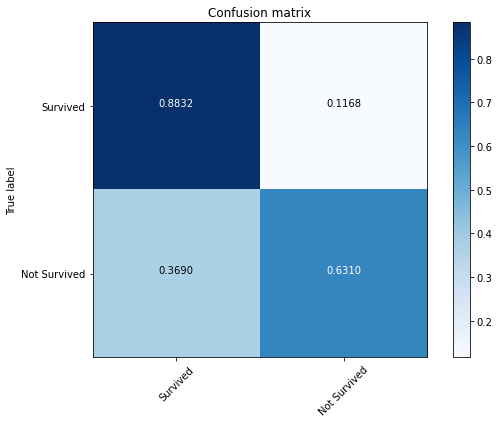

In [255]:
mm,bp,bs=training(X_train,y_train,'Knn')
print ('Best parameter:', bp)
#print ('Best accuracy:', bs)

predic = mm.predict(X_test)
confm = confusion_matrix(y_test, predic,normalize='true')
plot_confusion_matrix(confm,target_names)

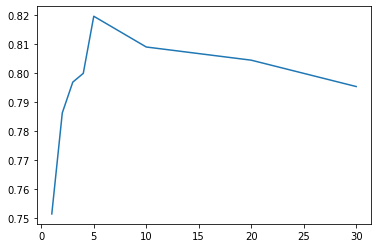

In [256]:
plt.plot([1,2,3,4,5,10,20,30],mm.cv_results_['mean_test_accuracy_score'])

In [257]:
print(metrics.classification_report(y_test, predic))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       137
           1       0.77      0.63      0.69        84

    accuracy                           0.79       221
   macro avg       0.78      0.76      0.77       221
weighted avg       0.79      0.79      0.78       221



In [258]:
best_knn=mm.best_estimator_
best_knn.fit(X_c,y_c)
scores=cross_val_score(best_knn, X_c,y_c, cv=5,scoring=make_scorer(accuracy_score))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.05)


## Logistic Regression

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best parameter: {'C': 0.31622776601683794}


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-3)]: Done  50 out of  50 | elapsed:    0.1s finished


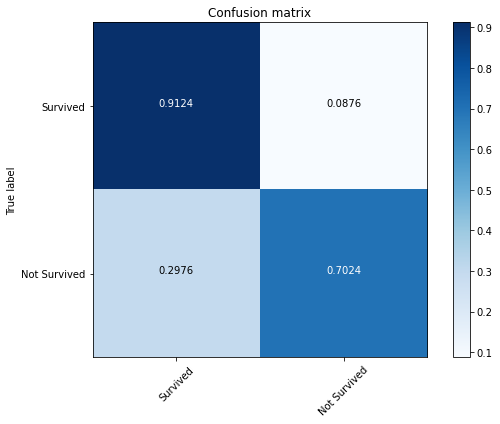

In [259]:
mm,bp,bs=training(X_train,y_train,'Logistic Regression')
print ('Best parameter:', bp)
#print ('Best accuracy:', bs)

predic = mm.predict(X_test)
confm = confusion_matrix(y_test, predic,normalize='true')
plot_confusion_matrix(confm,target_names)

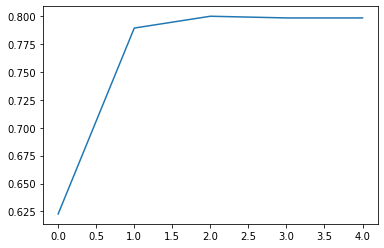

In [260]:
plt.plot(mm.cv_results_['mean_test_accuracy_score'])

In [261]:
print(metrics.classification_report(y_test, predic))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       137
           1       0.83      0.70      0.76        84

    accuracy                           0.83       221
   macro avg       0.83      0.81      0.82       221
weighted avg       0.83      0.83      0.83       221



In [262]:
best_lr=mm.best_estimator_
best_lr.fit(X_c,y_c)
scores=cross_val_score(best_lr, X_c, y_c, cv=5,scoring=make_scorer(accuracy_score))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.05)


## Random Forest 

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-3)]: Done 200 tasks      | elapsed:    1.2s


Best parameter: {'max_depth': 7, 'n_estimators': 22}


[Parallel(n_jobs=-3)]: Done 1350 out of 1350 | elapsed:    9.1s finished


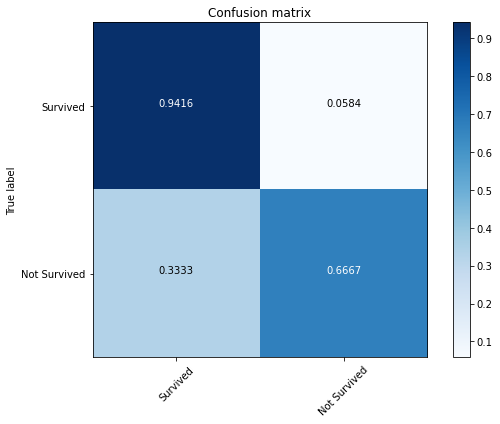

In [263]:
mm,bp,bs=training(X_train,y_train,'Random Forest')
print ('Best parameter:', bp)
#print ('Best accuracy:', bs)

predic = mm.predict(X_test)
confm = confusion_matrix(y_test, predic,normalize='true')
plot_confusion_matrix(confm,target_names)

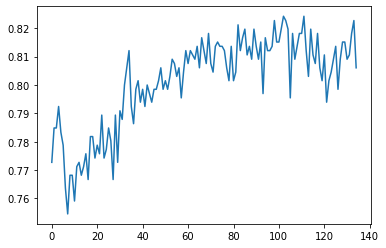

In [264]:
plt.plot(mm.cv_results_['mean_test_accuracy_score'])

In [265]:
print(metrics.classification_report(y_test, predic))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       137
           1       0.88      0.67      0.76        84

    accuracy                           0.84       221
   macro avg       0.85      0.80      0.82       221
weighted avg       0.84      0.84      0.83       221



In [266]:
best_rf=mm.best_estimator_
best_rf.fit(X_c,y_c)
scores=cross_val_score(best_rf, X_c, y_c, cv=5,scoring=make_scorer(accuracy_score))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.05)


## Multilayer Perceptron

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-3)]: Done  10 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-3)]: Done  40 out of  40 | elapsed:   17.7s finished


Best parameter: {'hidden_layer_sizes': (7, 6, 5, 4, 3, 2)}


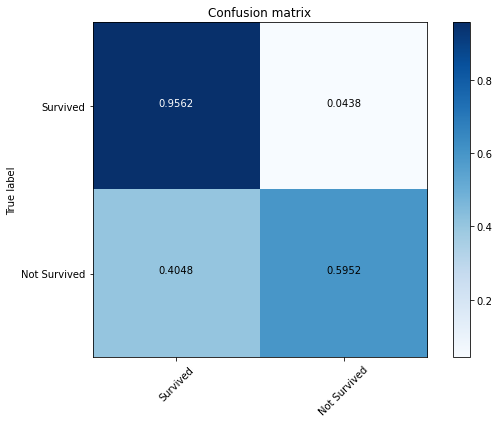

In [267]:
mm,bp,bs=training(X_train,y_train,'Multilayer Perceptron')
print ('Best parameter:', bp)
#print ('Best accuracy:', bs)

predic = mm.predict(X_test)
confm = confusion_matrix(y_test, predic,normalize='true')
plot_confusion_matrix(confm,target_names)

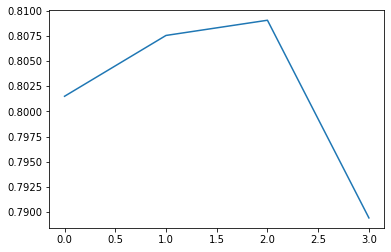

In [268]:
plt.plot(mm.cv_results_['mean_test_accuracy_score'])

In [269]:
print(metrics.classification_report(y_test, predic))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       137
           1       0.89      0.60      0.71        84

    accuracy                           0.82       221
   macro avg       0.84      0.78      0.79       221
weighted avg       0.83      0.82      0.81       221



In [270]:
best_mlp=mm.best_estimator_
best_mlp.fit(X_c,y_c)
scores=cross_val_score(best_mlp, X_c,y_c, cv=5,scoring=make_scorer(accuracy_score))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.81 (+/- 0.05)


## Classification Tree

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best parameter: {'max_depth': 50}


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-3)]: Done  40 out of  40 | elapsed:    0.1s finished


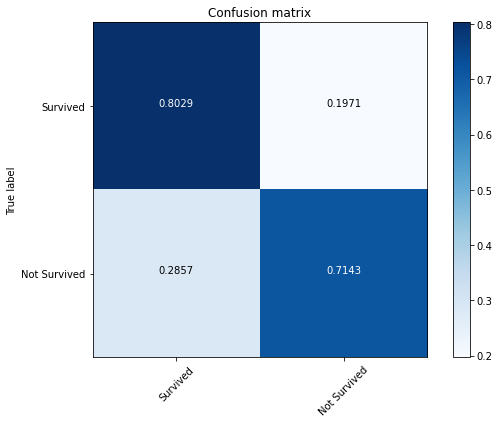

In [271]:
mm,bp,bs=training(X_train,y_train,'Classification Tree')
print ('Best parameter:', bp)
#print ('Best accuracy:', bs)

predic = mm.predict(X_test)
confm = confusion_matrix(y_test, predic,normalize='true')
plot_confusion_matrix(confm,target_names)

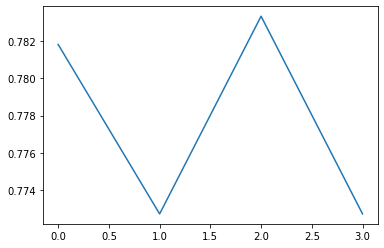

In [272]:
plt.plot(mm.cv_results_['mean_test_accuracy_score'])

In [273]:
print(metrics.classification_report(y_test, predic))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       137
           1       0.69      0.71      0.70        84

    accuracy                           0.77       221
   macro avg       0.76      0.76      0.76       221
weighted avg       0.77      0.77      0.77       221



In [274]:
best_ct=mm.best_estimator_
best_ct.fit(X_c,y_c)
scores=cross_val_score(best_ct, X_c, y_c, cv=5,scoring=make_scorer(accuracy_score))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.78 (+/- 0.06)


# Prepare the solution

In [275]:
X_test_p.shape

(418, 12)

In [276]:
y_pred = best_rf.predict(X_test_p)

In [277]:
solution = pd.DataFrame({"PassengerId":test_data.PassengerId.unique(), "Survived":y_pred})
solution.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [278]:
solution.to_csv("solution_rf.csv", index=False)